In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [10]:
import matplotlib
print(matplotlib.__file__)

d:\Kuliah\Semester 7\Data Wrangling\Project\stresss\.venv\Lib\site-packages\matplotlib\__init__.py


# Kaggle : Mental Health in Tech Survey

In [11]:
df = pd.read_csv ('../dataset/kaggle_survey.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [12]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [15]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [16]:
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    unique_count = df[col].nunique()
    print(f"{i:2d}. {col:30s} {str(dtype):10s} | Unique values: {unique_count:3d}")

 1. Timestamp                      object     | Unique values: 1246
 2. Age                            int64      | Unique values:  53
 3. Gender                         object     | Unique values:  49
 4. Country                        object     | Unique values:  48
 5. state                          object     | Unique values:  45
 6. self_employed                  object     | Unique values:   2
 7. family_history                 object     | Unique values:   2
 8. treatment                      object     | Unique values:   2
 9. work_interfere                 object     | Unique values:   4
10. no_employees                   object     | Unique values:   6
11. remote_work                    object     | Unique values:   2
12. tech_company                   object     | Unique values:   2
13. benefits                       object     | Unique values:   3
14. care_options                   object     | Unique values:   3
15. wellness_program               object     | Unique values

In [17]:
def create_data_summary(df):
    """Create comprehensive data summary"""
    summary_data = []
    for col in df.columns:
        dtype = df[col].dtype
        non_null = df[col].notnull().sum()
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        unique_count = df[col].nunique()
        
        # Get sample values (first 3 non-null unique values)
        if dtype == 'object':
            sample_vals = df[col].dropna().unique()[:3]
            sample_str = ', '.join([str(x) for x in sample_vals]) if len(sample_vals) > 0 else 'N/A'
        else:
            sample_str = f"Min: {df[col].min():.2f}, Max: {df[col].max():.2f}"
        
        summary_data.append({
            'Column': col,
            'Data_Type': dtype,
            'Non_Null': non_null,
            'Null_Count': null_count,
            'Null_Percentage': f"{null_pct:.1f}%",
            'Unique_Values': unique_count,
            'Sample_Values': sample_str[:50] + '...' if len(sample_str) > 50 else sample_str
        })
    
    return pd.DataFrame(summary_data)

summary_df = create_data_summary(df)
print("\n📈 COMPREHENSIVE DATA SUMMARY:")
print(summary_df.to_string())


📈 COMPREHENSIVE DATA SUMMARY:
                       Column Data_Type  Non_Null  Null_Count Null_Percentage  Unique_Values                                          Sample_Values
0                   Timestamp    object      1259           0            0.0%           1246  2014-08-27 11:29:31, 2014-08-27 11:29:37, 2014-08-...
1                         Age     int64      1259           0            0.0%             53                     Min: -1726.00, Max: 99999999999.00
2                      Gender    object      1259           0            0.0%             49                                        Female, M, Male
3                     Country    object      1259           0            0.0%             48                  United States, Canada, United Kingdom
4                       state    object       744         515           40.9%             45                                             IL, IN, TX
5               self_employed    object      1241          18            1.4%    

In [20]:
print(f"   Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"   Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Quick peek at the data
print("\nFIRST LOOK AT DATA:")
print(df.head())
print(f"\nCOLUMN NAMES:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

   Shape: 1259 rows, 27 columns
   Memory usage: 0.26 MB

FIRST LOOK AT DATA:
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

  tech_company    benefits care_

In [21]:
# Check data types
print("\n📊 DATA TYPES:")
print(df.dtypes)

# Get basic info
print("\n📈 BASIC INFORMATION:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Columns with missing values: {df.isnull().any().sum()}")

# Create a summary table
summary_data = []
for col in df.columns:
    dtype = df[col].dtype
    non_null = df[col].notnull().sum()
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    unique_count = df[col].nunique()
    
    summary_data.append({
        'Column': col,
        'Type': dtype,
        'Non-Null': non_null,
        'Null': null_count,
        'Null %': f"{null_pct:.1f}%",
        'Unique': unique_count
    })

summary_df = pd.DataFrame(summary_data)
print("\n📋 COMPREHENSIVE SUMMARY:")
print(summary_df.to_string())


📊 DATA TYPES:
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [24]:
# 1. Age column problems
print("\n1. AGE COLUMN ISSUES:")
print(f"   Minimum age: {df['Age'].min()} (SHOULD BE >= 0!)")
print(f"   Maximum age: {df['Age'].max()} (REALISTIC SHOULD BE < 120!)")

if df['Age'].min() < 0:
    print(f"    FOUND NEGATIVE AGES: {(df['Age'] < 0).sum()} entries")
if df['Age'].max() > 100:
    print(f"    FOUND AGES > 100: {(df['Age'] > 100).sum()} entries")

# 2. Gender column problems
print("\n2. GENDER COLUMN ISSUES:")
print(f"   Unique gender values: {df['Gender'].nunique()} (TOO MANY!)")
print("   Top 10 gender values:")
print(df['Gender'].value_counts().head(10))

# 3. Missing values
print("\n3. MISSING VALUES ISSUES:")
missing_cols = summary_df[summary_df['Null'] > 0]
print(f"   Columns with missing values: {len(missing_cols)}")
for _, row in missing_cols.iterrows():
    if row['Null %'] > '5%':
        print(f"{row['Column']}: {row['Null']} missing ({row['Null %']})")


1. AGE COLUMN ISSUES:
   Minimum age: -1726 (SHOULD BE >= 0!)
   Maximum age: 99999999999 (REALISTIC SHOULD BE < 120!)
    FOUND NEGATIVE AGES: 3 entries
    FOUND AGES > 100: 2 entries

2. GENDER COLUMN ISSUES:
   Unique gender values: 49 (TOO MANY!)
   Top 10 gender values:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64

3. MISSING VALUES ISSUES:
   Columns with missing values: 4
comments: 1095 missing (87.0%)



STEP 5: FIXING AGE COLUMN

🔍 ANALYZING AGE PROBLEMS:
Found 3 negative ages
Found 2 ages > 100

Negative ages found:
       Age Gender         Country
143    -29   Male   United States
715  -1726   male  United Kingdom
1127    -1      p   United States

🧹 CLEANING AGE COLUMN...
   Ages set to NaN: 5
   Imputed with median: 31.0

✅ AGE COLUMN FIXED!
   Clean age range: 5 to 72
   Age groups created successfully


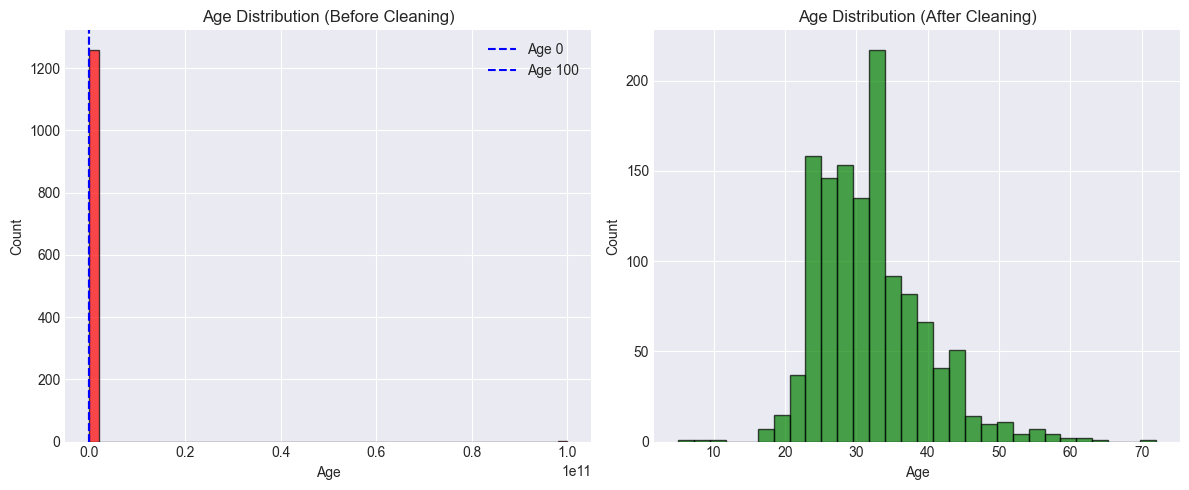

In [ ]:
# ============================================
# 5. FIX THE AGE COLUMN - MOST CRITICAL
# ============================================
print("\n" + "="*60)
print("STEP 5: FIXING AGE COLUMN")
print("="*60)

# Step 1: Create a backup
df['Age_original'] = df['Age']

# Step 2: Find and fix extreme values
print("\n🔍 ANALYZING AGE PROBLEMS:")

# Show the extreme values
negative_ages = df[df['Age'] < 0]
crazy_ages = df[df['Age'] > 100]

print(f"Found {len(negative_ages)} negative ages")
print(f"Found {len(crazy_ages)} ages > 100")

if len(negative_ages) > 0:
    print("\nNegative ages found:")
    print(negative_ages[['Age', 'Gender', 'Country']].head())

# Step 3: Fix the age column
print("\n🧹 CLEANING AGE COLUMN...")

# Create clean age column
df['Age_clean'] = df['Age']

# Replace unrealistic ages with NaN
df.loc[df['Age'] < 0, 'Age_clean'] = np.nan
df.loc[df['Age'] > 100, 'Age_clean'] = np.nan

print(f"   Ages set to NaN: {df['Age_clean'].isnull().sum()}")

# Step 4: Impute missing ages with median
age_median = df['Age_clean'].median()
df['Age_clean'] = df['Age_clean'].fillna(age_median)

print(f"   Imputed with median: {age_median:.1f}")

# Step 5: Create age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_group'] = pd.cut(df['Age_clean'], bins=bins, labels=labels, include_lowest=True)

print("\n✅ AGE COLUMN FIXED!")
print(f"   Clean age range: {df['Age_clean'].min():.0f} to {df['Age_clean'].max():.0f}")
print(f"   Age groups created successfully")

# Visualize the fix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before cleaning
axes[0].hist(df['Age_original'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('Age Distribution (Before Cleaning)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].axvline(x=0, color='blue', linestyle='--', label='Age 0')
axes[0].axvline(x=100, color='blue', linestyle='--', label='Age 100')
axes[0].legend()

# After cleaning
axes[1].hist(df['Age_clean'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Age Distribution (After Cleaning)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
# plt.savefig('age_cleaning_comparison.png', dpi=300)
plt.show()


STEP 6: FIXING GENDER COLUMN

🔍 FOUND 49 UNIQUE GENDER VALUES

✅ GENDER COLUMN CLEANED:
Gender_clean
Male      1192
Female      54
Other       13
Name: count, dtype: int64


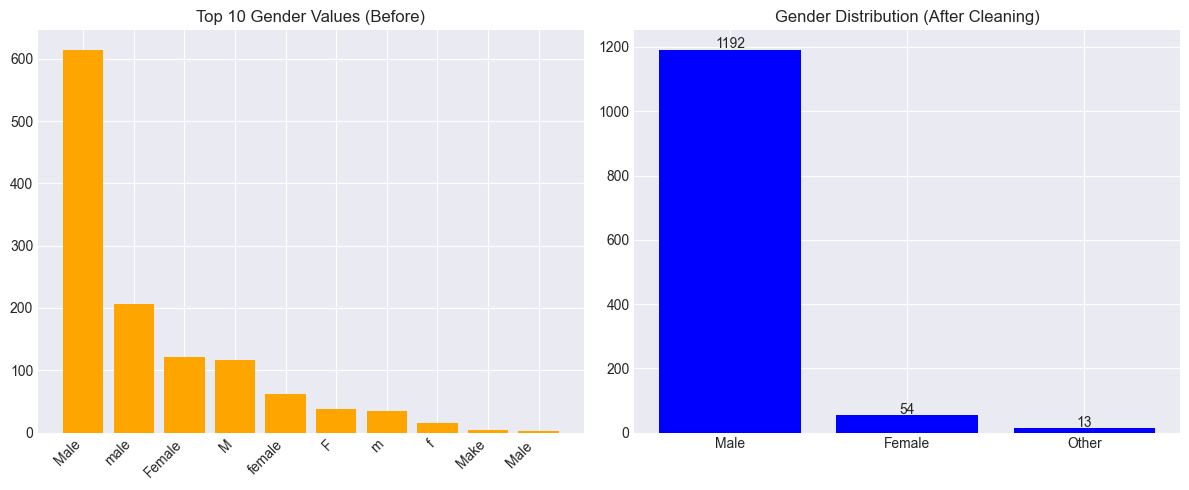

In [27]:
# ============================================
# 6. FIX GENDER COLUMN
# ============================================
print("\n" + "="*60)
print("STEP 6: FIXING GENDER COLUMN")
print("="*60)

print(f"\n🔍 FOUND {df['Gender'].nunique()} UNIQUE GENDER VALUES")

# Define cleaning function
def clean_gender_simple(gender):
    """Simple gender cleaning function"""
    if pd.isna(gender):
        return 'Other'
    
    gender = str(gender).lower().strip()
    
    # Male
    if any(x in gender for x in ['male', 'm', 'man', 'mal', 'maile']):
        return 'Male'
    
    # Female
    if any(x in gender for x in ['female', 'f', 'woman', 'fem', 'femail']):
        return 'Female'
    
    # Everything else
    return 'Other'

# Apply cleaning
df['Gender_clean'] = df['Gender'].apply(clean_gender_simple)

print("\n✅ GENDER COLUMN CLEANED:")
print(df['Gender_clean'].value_counts())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
top_10_before = df['Gender'].value_counts().head(10)
axes[0].bar(range(len(top_10_before)), top_10_before.values, color='orange')
axes[0].set_title('Top 10 Gender Values (Before)')
axes[0].set_xticks(range(len(top_10_before)))
axes[0].set_xticklabels(top_10_before.index, rotation=45, ha='right')

# After
gender_counts = df['Gender_clean'].value_counts()
axes[1].bar(gender_counts.index, gender_counts.values, color='blue')
axes[1].set_title('Gender Distribution (After Cleaning)')
for i, count in enumerate(gender_counts.values):
    axes[1].text(i, count + 5, str(count), ha='center')

plt.tight_layout()
# plt.savefig('gender_cleaning_comparison.png', dpi=300)
plt.show()

In [28]:
# ============================================
# 7. HANDLE OTHER MISSING VALUES
# ============================================
print("\n" + "="*60)
print("STEP 7: HANDLING MISSING VALUES")
print("="*60)

# List of columns with missing values
missing_report = df.isnull().sum()
missing_cols = missing_report[missing_report > 0]

print(f"\n🔍 COLUMNS WITH MISSING VALUES:")
for col, count in missing_cols.items():
    percentage = (count / len(df)) * 100
    print(f"   {col}: {count} missing ({percentage:.1f}%)")

# Fix each column
print("\n🧹 FIXING MISSING VALUES...")

# 1. self_employed - fill with 'No' (most common)
if 'self_employed' in df.columns:
    df['self_employed'] = df['self_employed'].fillna('No')
    print("   • self_employed: Filled with 'No'")

# 2. work_interfere - create 'Not specified' category
if 'work_interfere' in df.columns:
    df['work_interfere'] = df['work_interfere'].fillna('Not specified')
    print("   • work_interfere: Created 'Not specified' category")

# 3. state - many missing (non-US countries), create indicator
if 'state' in df.columns:
    df['has_state_info'] = df['state'].notnull().astype(int)
    print("   • state: Created 'has_state_info' indicator")

# 4. comments - expected to have many missing (optional field)
if 'comments' in df.columns:
    df['left_comment'] = df['comments'].notnull().astype(int)
    print("   • comments: Created 'left_comment' indicator")

print("\n✅ MISSING VALUES HANDLED!")
print(f"   Remaining missing values: {df.isnull().sum().sum()}")


STEP 7: HANDLING MISSING VALUES

🔍 COLUMNS WITH MISSING VALUES:
   state: 515 missing (40.9%)
   self_employed: 18 missing (1.4%)
   work_interfere: 264 missing (21.0%)
   comments: 1095 missing (87.0%)

🧹 FIXING MISSING VALUES...
   • self_employed: Filled with 'No'
   • work_interfere: Created 'Not specified' category
   • state: Created 'has_state_info' indicator
   • comments: Created 'left_comment' indicator

✅ MISSING VALUES HANDLED!
   Remaining missing values: 1610


In [29]:
# ============================================
# 8. BASIC EXPLORATORY DATA ANALYSIS
# ============================================
print("\n" + "="*60)
print("STEP 8: BASIC EXPLORATORY ANALYSIS")
print("="*60)

# 8.1 Analyze target variable
print("\n🎯 TARGET VARIABLE ANALYSIS (treatment):")
treatment_counts = df['treatment'].value_counts()
for status, count in treatment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {status}: {count} ({percentage:.1f}%)")

# 8.2 Analyze key demographics
print("\n👥 DEMOGRAPHIC ANALYSIS:")

# Age groups
print("\n   Age Groups:")
age_groups = df['Age_group'].value_counts().sort_index()
for group, count in age_groups.items():
    percentage = (count / len(df)) * 100
    print(f"     {group}: {count} ({percentage:.1f}%)")

# Gender
print("\n   Gender:")
gender_dist = df['Gender_clean'].value_counts()
for gender, count in gender_dist.items():
    percentage = (count / len(df)) * 100
    print(f"     {gender}: {count} ({percentage:.1f}%)")

# Country
print("\n   Top 5 Countries:")
top_countries = df['Country'].value_counts().head(5)
for country, count in top_countries.items():
    percentage = (count / len(df)) * 100
    print(f"     {country}: {count} ({percentage:.1f}%)")


STEP 8: BASIC EXPLORATORY ANALYSIS

🎯 TARGET VARIABLE ANALYSIS (treatment):
   Yes: 637 (50.6%)
   No: 622 (49.4%)

👥 DEMOGRAPHIC ANALYSIS:

   Age Groups:
     <20: 25 (2.0%)
     20-29: 557 (44.2%)
     30-39: 529 (42.0%)
     40-49: 122 (9.7%)
     50-59: 22 (1.7%)
     60+: 4 (0.3%)

   Gender:
     Male: 1192 (94.7%)
     Female: 54 (4.3%)
     Other: 13 (1.0%)

   Top 5 Countries:
     United States: 751 (59.7%)
     United Kingdom: 185 (14.7%)
     Canada: 72 (5.7%)
     Germany: 45 (3.6%)
     Netherlands: 27 (2.1%)



STEP 9: CREATING KEY VISUALIZATIONS


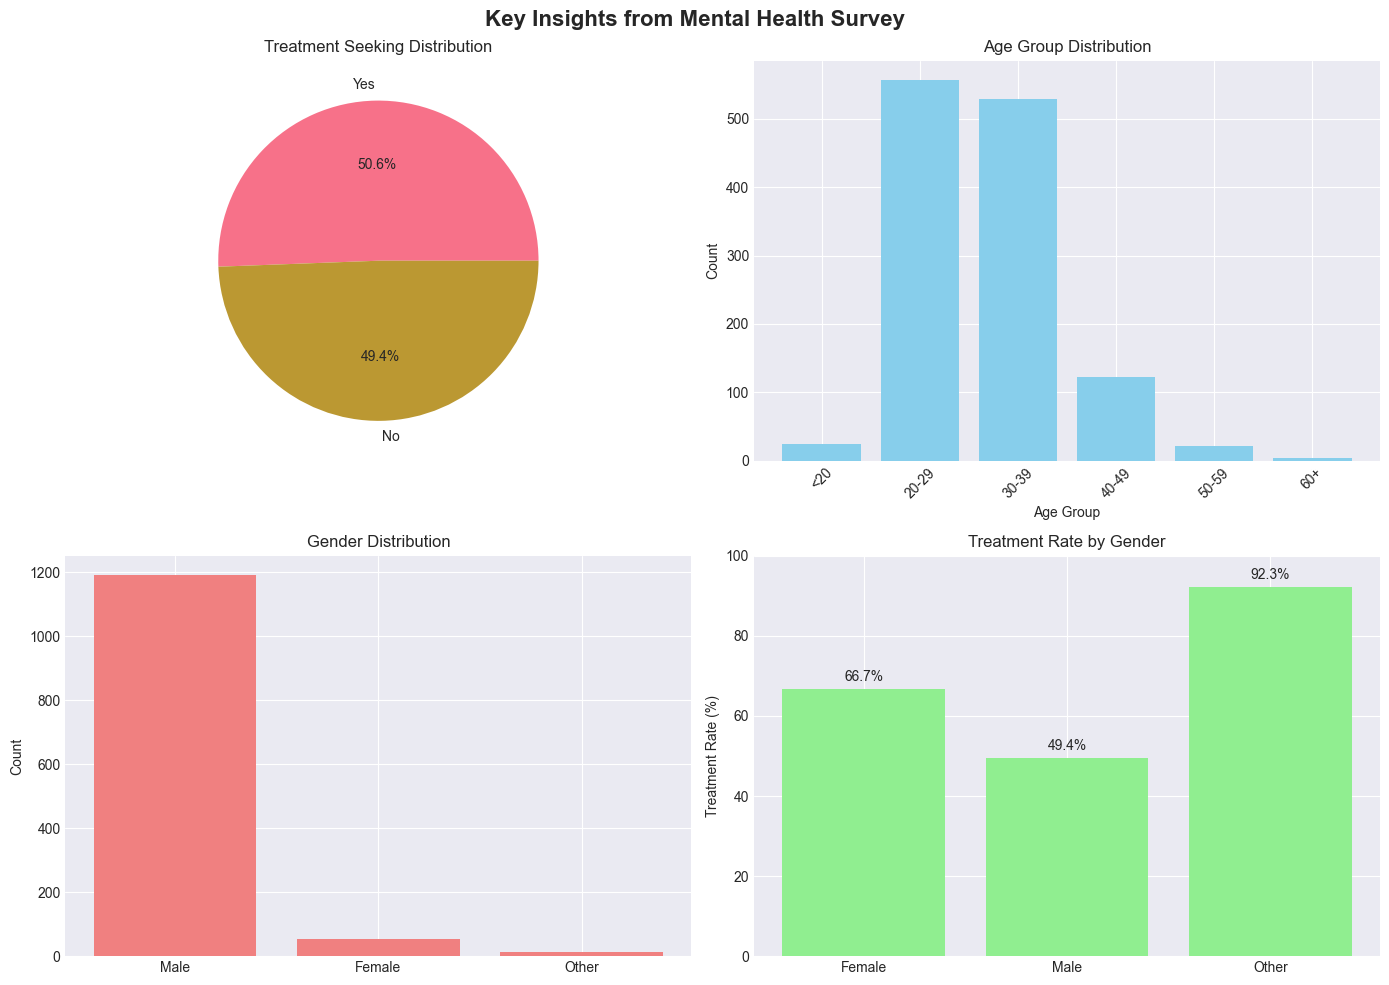

In [30]:
# ============================================
# 9. CREATE BASIC VISUALIZATIONS
# ============================================
print("\n" + "="*60)
print("STEP 9: CREATING KEY VISUALIZATIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Treatment distribution
axes[0, 0].pie(treatment_counts.values, labels=treatment_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Treatment Seeking Distribution')

# 2. Age distribution
axes[0, 1].bar(age_groups.index, age_groups.values, color='skyblue')
axes[0, 1].set_title('Age Group Distribution')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Gender distribution
axes[1, 0].bar(gender_dist.index, gender_dist.values, color='lightcoral')
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_ylabel('Count')

# 4. Treatment by gender
treatment_by_gender = df.groupby('Gender_clean')['treatment'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
axes[1, 1].bar(treatment_by_gender.index, treatment_by_gender.values, color='lightgreen')
axes[1, 1].set_title('Treatment Rate by Gender')
axes[1, 1].set_ylabel('Treatment Rate (%)')
axes[1, 1].set_ylim([0, 100])
for i, rate in enumerate(treatment_by_gender.values):
    axes[1, 1].text(i, rate + 2, f'{rate:.1f}%', ha='center')

plt.suptitle('Key Insights from Mental Health Survey', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('key_insights.png', dpi=300)
plt.show()


STEP 10: ANALYZING KEY PREDICTORS

🔍 ANALYZING PREDICTORS VS TREATMENT:


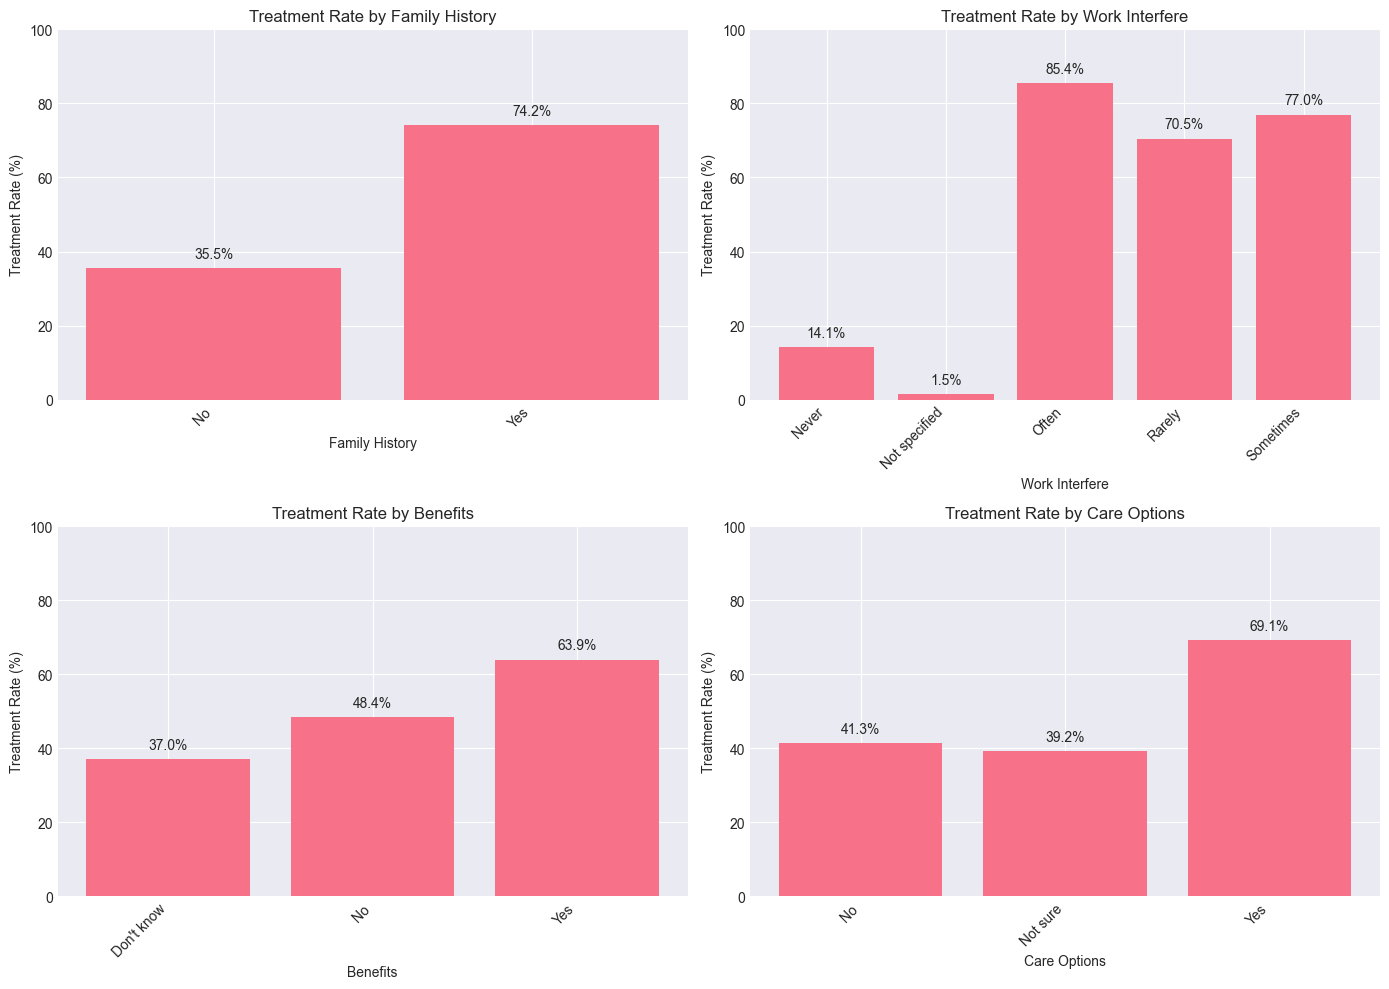


📊 KEY INSIGHTS:

   Family History:
     • No: 35.5% seek treatment
     • Yes: 74.2% seek treatment

   Work Interfere:
     • Never: 14.1% seek treatment
     • Not specified: 1.5% seek treatment
     • Often: 85.4% seek treatment
     • Rarely: 70.5% seek treatment
     • Sometimes: 77.0% seek treatment

   Benefits:
     • Don't know: 37.0% seek treatment
     • No: 48.4% seek treatment
     • Yes: 63.9% seek treatment

   Care Options:
     • No: 41.3% seek treatment
     • Not sure: 39.2% seek treatment
     • Yes: 69.1% seek treatment


In [31]:
# ============================================
# 10. ANALYZE IMPORTANT PREDICTORS
# ============================================
print("\n" + "="*60)
print("STEP 10: ANALYZING KEY PREDICTORS")
print("="*60)

# List of key predictors to analyze
key_predictors = ['family_history', 'work_interfere', 'benefits', 'care_options']

print("\n🔍 ANALYZING PREDICTORS VS TREATMENT:")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, predictor in enumerate(key_predictors):
    if idx < len(key_predictors):
        # Calculate treatment rates
        treatment_rates = df.groupby(predictor)['treatment'].apply(
            lambda x: (x == 'Yes').mean() * 100
        )
        
        # Create bar plot
        bars = axes[idx].bar(range(len(treatment_rates)), treatment_rates.values)
        axes[idx].set_title(f'Treatment Rate by {predictor.replace("_", " ").title()}')
        axes[idx].set_xlabel(predictor.replace('_', ' ').title())
        axes[idx].set_ylabel('Treatment Rate (%)')
        axes[idx].set_xticks(range(len(treatment_rates)))
        axes[idx].set_xticklabels(treatment_rates.index, rotation=45, ha='right')
        axes[idx].set_ylim([0, 100])
        
        # Add value labels
        for bar, rate in zip(bars, treatment_rates.values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height + 2,
                         f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('predictor_analysis.png', dpi=300)
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
for predictor in key_predictors:
    rates = df.groupby(predictor)['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)
    print(f"\n   {predictor.replace('_', ' ').title()}:")
    for value, rate in rates.items():
        print(f"     • {value}: {rate:.1f}% seek treatment")